# Exploratory Data Analysis of Amazon Customer Reviews Dataset
---

 <a id='executive'></a>

## Executive Summary

In our analysis we were able to look at:
- the distribution of ratings among products and customers.
- determine the most popular products and categories.
- look at the highest rated categories and see what affects rating averages.
- observe how ratings change over time.
- determine the point where the Amazon marketplace exploded in growth.

We have found that:
- over 60% of all reviews receive 5 star ratings.
- most products have between 100 and 1,000 reviews.
- out of 11,500+ products, less than 250 have an average rating under 3.0.
- 90% of the Amazon marketplace revolves around books, music, movies and mobile apps.
- the top 3 categories have intangible products (digital).

-----

**Distribution of Ratings Among Products and Customers**

Positive ratings occur over 80% of the time, while negative ratings occur roughly 15% of the time and neutral ratings occur 5% of the time.  Roughly 75% of all customers have only reviewed products one time, while roughly 24% have reviewed up to 10 products.  1 customer has reviewed almost 700 products.  Well over 50% of products average a 4.5 or higher rating, while over 90% have a 3.5 or higher rating.

**Most Popular Products and Categories**

Candy Crush is the most popular product reviewed on Amazon which is a mobile app. Every product in the top 10 has over 25,000 reviews with Candy Crush and The Secret Mystery having over 40,000 reviews.  6 of the top 10 categories dominate the marketplace with well over 90% of total ratings and reviews.

**Ratings Among Product Categories**

The range in average ratings from highest to lowest is 0.84, from 3.84 to 4.68.  The categories rated low seem to be categories where customers don't know what they may be receiving, variability of quality among the same type of products, while the categories rated highly seem to have less variability in what one can receive.  The biggest factor that seems to determine a product category's average rating is how many 5 stars, 4 stars and 1 stars that category receives.

**Ratings by Year**

Over time, the average annual product review has stayed between 4.1 and 4.4.  The Amazon marketplace started gaining popularity in 2010 and exploded exponentially from 2011 onwards. 

**Ratings by Month**

December has the most reviews, followed by January. This is likely because of the holiday season and the purchasing and exchange of gifts. January is likely high because money is often a popular gift during the holidays and customers make purchases after the holidays are over. 

-----
We will now go through the report more extensively to further understand the above observations.

<a id='Table of Contents'></a>

<a id='table'></a>

-----
## Table of Contents 

#### <a href='#executive'>Executive Summary</a>

#### <a href='#introduction'>Introduction</a>

#### <a href='#import'>Import Dataset</a>

----
#### <a href='#distribution'>Distribution of Ratings Among Products and Categories</a>

- <a href='#cumulative'>Cumulative Distributions</a>

- <a href='#customer'>Distribution of Customer Rating Frequency</a>

- <a href='#scores'>Distribution of Rating Scores</a>

#### <a href='#popular'>Most Popular Products and Categories</a>

- <a href='#top10'>Top 10 Most Rated</a>

- <a href='#top3'>Top 3 of Each Category</a>

#### <a href='#categories'>Ratings Among Product Categories</a>

- <a href='#category'>Average Rating per Category</a>

- <a href='#product'>Breakdown of Ratings by Product Category</a>

#### <a href='#year'>Ratings by Year</a>

- <a href='#annual'>Annual Averages</a>

- <a href='#number'>Number of Ratings per Year</a>

#### <a href='#month'>Ratings by Month</a>

- <a href='#monthly'>Monthly Rating Distributions</a>

- <a href='#breakdown'>Breakdown of Monthly Rating Distributions</a>

#### <a href='#time'>Ratings Over Time</a>

----
#### <a href='#conclusion'>Conclusion</a>

<a id='intro'></a>

-----  

## Introduction
Amazon is a multinational technology company based in Seattle, Washington, that focuses on e-commerce, cloud computing, digital streaming, artificial intelligence and more.  One of its most popular services is the e-commerce website ‘Amazon.com.’  The website offers a plethora of different types of products ranging from automotive to sports to groceries to hardware tools to digital products and more.  A shopper can purchase almost anything on Amazon.com.  

One of the ways Amazon keeps its shoppers engaged is by way of its product recommendation system.  The product recommendation system uses content and collaborative based filtering, looking at a shopper’s past purchases and purchases by shoppers who purchased similar items and then recommends items that the shopper may like based off of these two behaviors.  Collaborative filtering enables the shopper to see items from other categories, while content based filtering allows shoppers to see domain specific items. 


### Problem Statement:

“If you know my previous habits, you’re assuming I’m going to stay that way for the rest of my life.  You’re trying to channel me into buying a product.  I want to experience this world by stepping where I’ve never stepped before and buying something I never thought of buying.” 

    - Neil Degrasse Tyson

Recommendation systems are great at recommending similar products to shoppers, but they tend to be too concentrated, which does not let a shopper go outside their comfort zone or see something they may not have known they wanted.  For example, watching a video on Youtube will start to flood a user’s browser with several similar videos and not enough diversity in content.  As for the case with Amazon, we want to build a recommendation system that recommends a diverse selection of items or content to users as needed.


<a id='import'></a>


<a href='#table'>Table of Contents</a>

## Import Dataset

To begin the analysis, we must first import the cleaned Amazon Customer Reviews dataset which will allow use the following to make inferences:
- **customer_id**       - Random identifier that can be used to aggregate reviews written by a single author.
- **review_id**         - The unique ID of the review.
- **product_id**        - The unique Product ID the review pertains to.
- **product_parent**    - Random identifier that can be used to aggregate reviews for the same product.
- **product_title**     - Title of the product.
- **product_category**  - Broad product category that can be used to group reviews (also used to group the dataset into coherent parts).
- **star_rating**       - The 1-5 star rating of the review.

We will also split the review date into years, months and days and make the review date a time series object.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use('seaborn')

In [2]:
# Read in data
apr = pd.read_csv('APR_data/apr.csv')
apr.drop(columns='Unnamed: 0', inplace=True)

# Split review dates by year, month and day (strings)
time_split = apr.review_date.str.split('-', n=2, expand=True)
apr['year'] = time_split[0]
apr['month'] = time_split[1]
apr['day'] = time_split[2]

# Convert review dates into a datetime object
dates = apr.review_date
apr.review_date = [d.date() for d in pd.to_datetime(dates)]

# Extract month and year from review dates
apr['month_year'] = pd.to_datetime(apr['review_date']).dt.to_period('M')

<a id='distribution'></a>


<a href='#table'>Table of Contents</a>

## Distribution of Ratings Among Products and Customers

In this section we will be looking at the cumulative distributions of ratings overall, product ratings and customer reviews.  We will also look at customer rating frequency and the distribution of rating scores, average user rating and average product rating.

<a id='cumulative'></a>

### Cumulative Distributions

In [86]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

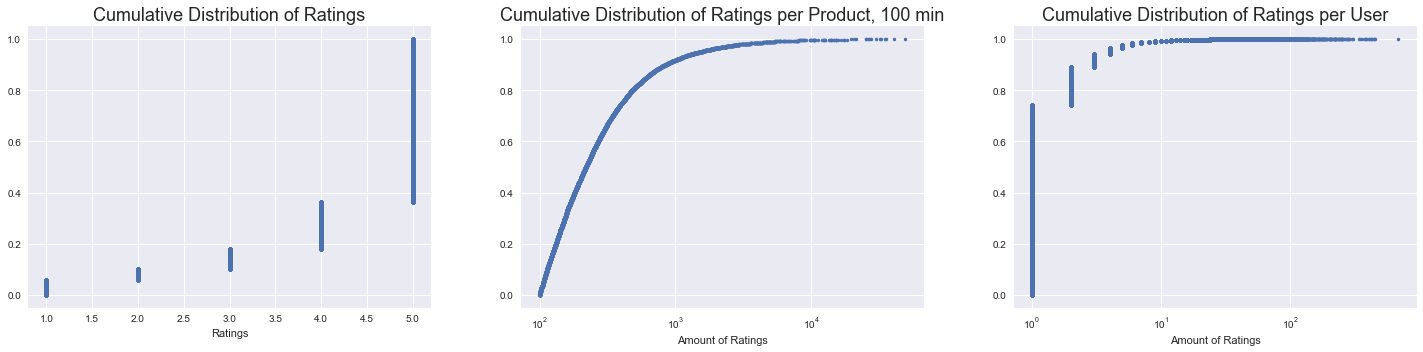

In [116]:
plt.figure(figsize=(20,5))

# Plot cumulative distribution of ratings
x, y = ecdf(apr.star_rating)

ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Ratings')
ax1.set_title('Cumulative Distribution of Ratings', fontsize=18)
plt.plot(x, y, marker='.', linestyle='none')


# Plot cumulative distribution of ratings per product, 100 minimum
x, y = ecdf(apr.groupby('product_id').star_rating.count())

ax2 = plt.subplot(1,3,2)
ax2.set_xlabel('Amount of Ratings')
ax2.plot(x, y, marker='.', linestyle='none')
ax2.set_xscale('log');
ax2.set_title('Cumulative Distribution of Ratings per Product, 100 min', fontsize=18)


# Plot cumulative distribution of ratings per user
x, y = ecdf(apr.groupby('customer_id').star_rating.count())

ax3 = plt.subplot(1,3,3)
ax3.set_xlabel('Amount of Ratings')
ax3.plot(x, y, marker='.', linestyle='none')
ax3.set_xscale('log');
ax3.set_title('Cumulative Distribution of Ratings per User', fontsize=18)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

##### Cumulative Distribution of Ratings
Over 60% of ratings receive 5 stars, while 1 star ratings occur less than 10% of the time.  Ratings between 2 and 4 stars occur roughly 30% of the time.  This means positive ratings occur over 80% of the time, while negative ratings occur roughly 15% of the time and neutral ratings occur 5% of the time.

##### Cumulative Distribution of Ratings per Product, 100 min
We wanted to used products that had a reasonable amount of purchases but still keep the dataset as intact as possible. With products with at least 100 purchases, we were able to hold on to 85% of our dataset.  Even though we lost roughly 75,000 unique products, most of them were single purchases of the same item with different product ids. This would cause much unneeded noise in our analysis and modeling phases.

<img src='https://raw.githubusercontent.com/dametreusv/amazon_hybrid_recommendation_system/master/visuals/under_100.png' width='750'>

Because of this, the cumulative distribution of products begins with 100.  60% of all products have between 100 and 500 reviews, while roughly 90% of products have up to 1,000 reviews.  Rouhgly 10% of products have between 1,000 and 10,000 reviews and some have over 10,000 reviews.

##### Cumulative Distribution of Ratings per User
Roughly 75% of all customers have only reviewed products one time, while roughly 24% have reviewed up to 10 products.  There is a small percentage that have reviewed between 10 and 100 products and an even smaller percantage that have reviewed over 100 products.

<a id='customer'></a>
#### <a href='#table'>Table of Contents</a>

### Distribution of Customer Rating Frequency

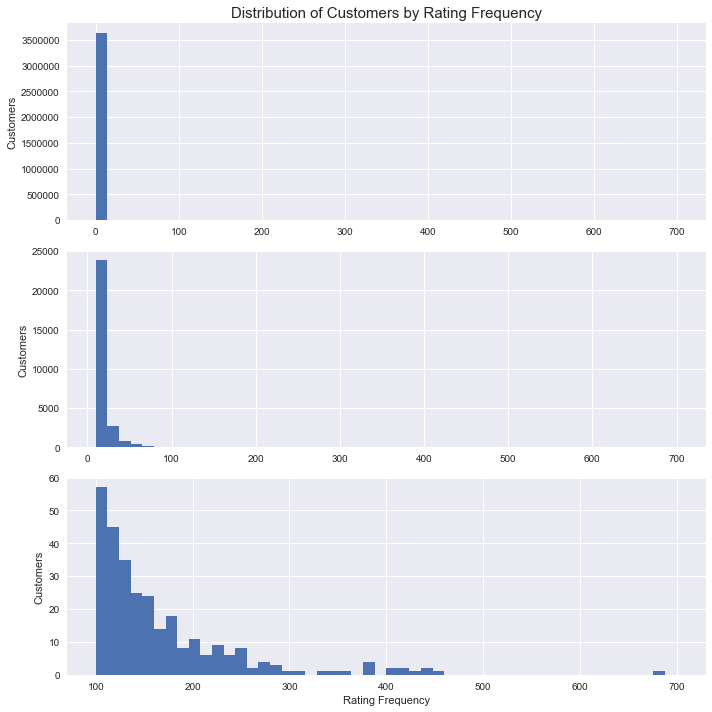

In [117]:
# Plot distribution of amount of ratings per user
plt.figure(figsize=(10,10))

ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(0,700), ax=ax1)
apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(10,700), ax=ax2)
apr.customer_id.value_counts().plot(kind='hist', bins=50, range=(100,700), ax=ax3)

ax1.set_title('Distribution of Customers by Rating Frequency', fontsize=15)
ax1.set_ylabel('Customers')
ax2.set_ylabel('Customers')
ax3.set_ylabel('Customers')
ax3.set_xlabel('Rating Frequency')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Over 3.5 million customers have given between 1 and 10 reviews on products, while roughly 30,000 have given between 10 and 100 reviews on products.  Roughly 300 customers have reviewed between 100 and 500 reviews. and less than 1 customer has reviewed almost 700 products.

<a id='scores'></a>
#### <a href='#table'>Table of Contents</a>

### Distribution of Rating Scores

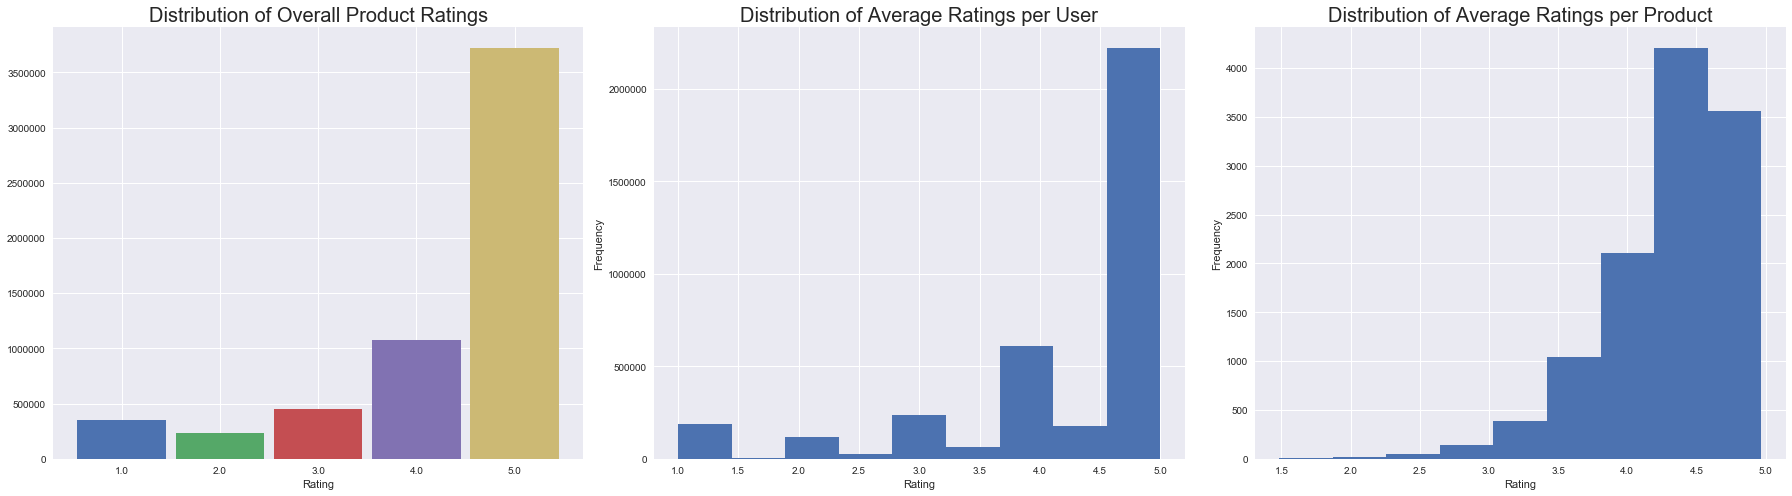

In [118]:
plt.figure(figsize=(25,7))

# Plot distribution of overall product ratings
ax1 = plt.subplot(1,3,1)
apr.star_rating.value_counts().sort_index().plot.bar(width=0.9, ax=ax1)
ax1.set_title('Distribution of Overall Product Ratings', fontsize=20)
ax1.set_xlabel('Rating')
plt.xticks(rotation=0)

# Plot user distribution by average rating
ax2 = plt.subplot(1,3,2)
apr.groupby('customer_id').star_rating.mean().plot(kind='hist', bins=9, ax=ax2)
ax2.set_title('Distribution of Average Ratings per User', fontsize=20)
ax2.set_xlabel('Rating')

# Plot distribution of overall ratings among products
ax3 = plt.subplot(1,3,3)
apr.groupby('product_id').star_rating.mean().plot(kind='hist', bins=9, ax=ax3)
ax3.set_title('Distribution of Average Ratings per Product', fontsize=20)
ax3.set_xlabel('Rating')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Overall distribution of product ratings closely match distribution of average user ratings in shape, although the numbers are different.  Well over 50% of products average a 4.5 or higher rating, while over 90% have a 3.5 or higher rating.  Typically, products on amazon are highly rated on average with under 250 total products out of 11,500+ having an average rating under 3.0.

<a id='popular'></a>


<a href='#table'>Table of Contents</a>

## Most Popular Products and Categories
Below we will be looking at the top 10 most rated products and categories and the top 3 products of the top 6 categories, which have well over 90% of all Amazon ratings and reviews.

<a id='top10'></a>

### Top 10 Most Rated

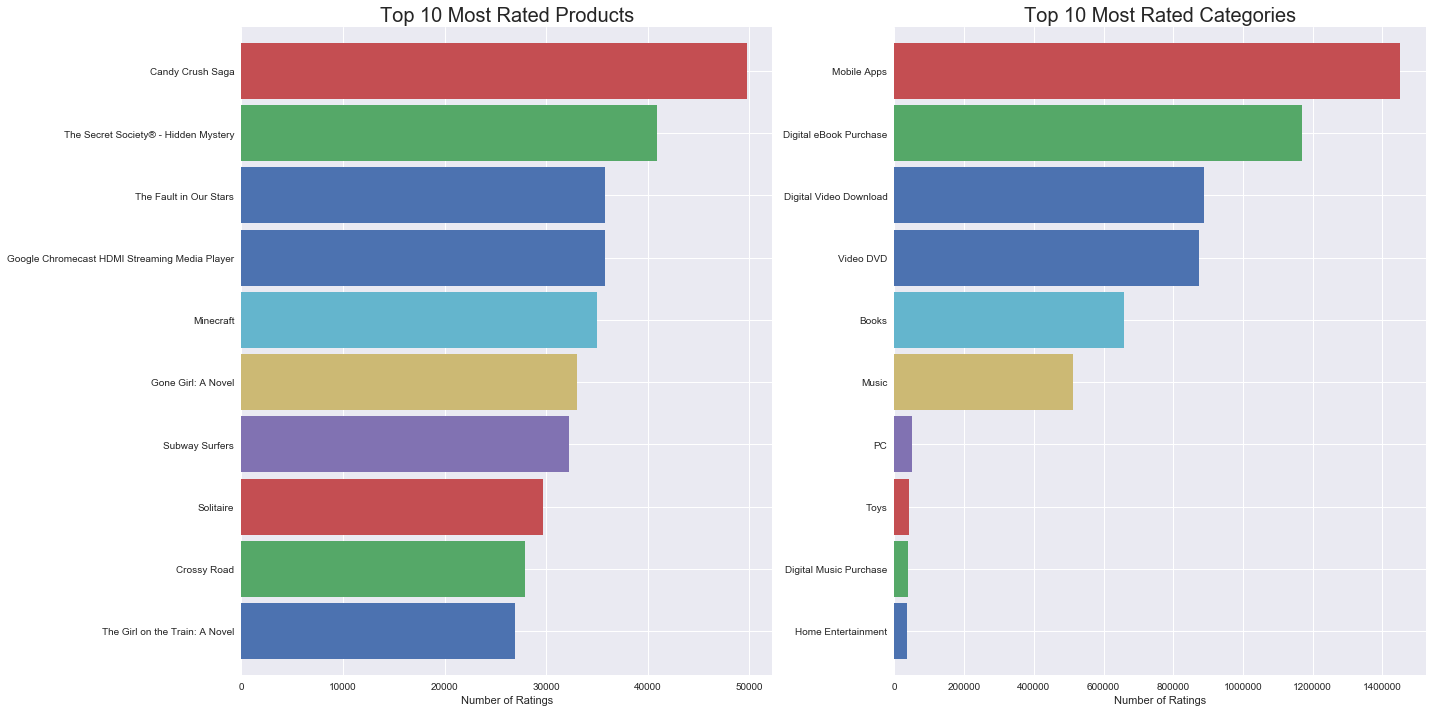

In [119]:
plt.figure(figsize=(20,10))

# Plot 10 most common products purchased
ax1 = plt.subplot(1,2,1)
apr.product_title.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax1)
ax1.set_xlabel('Number of Ratings')
ax1.set_title('Top 10 Most Rated Products', fontsize=20)

# Plot 10 most common categories purchased
ax2 = plt.subplot(1,2,2)
apr.product_category.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax2)
ax2.set_xlabel('Number of Ratings')
ax2.set_title('Top 10 Most Rated Categories', fontsize=20)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Candy Crush is the most popular product reviewed on Amazon which is a mobile app.  Other items in the top 10 include the Google Chromecast which is a streaming device and Gone Girl which is a novel.  Every product in the top 10 has over 25,000 reviews with Candy Crush and The Secret Mystery having over 40,000 reviews.

Mobile apps is the most popular category reviewed on Amazon, followed by books, movies and music.  6 of the top 10 categories dominate the marketplace with well over 90% of total ratings and reviews.  The top 3 categories are all intangibles, not having any physical attributes.

<a id='top3'></a>
#### <a href='#table'>Table of Contents</a>

### Top 3 of Each Category

In [4]:
# Create list of top 6 categories
categories = list(apr.product_category.value_counts().index[:6])

# Group dataset by product category and title and find the mean for star rating
top = apr.groupby(['product_category', 'product_title']).mean().reset_index()

# Convert purchase count to integer
top['purchased_counts'] = top['purchased_counts'].astype('int64')

# Print the top 3 most rated products for each category
for category in categories:
    print('Top 3 Most Common Products Rated in {}'.format(category))
    print(top[top.product_category == category].
          nlargest(3, columns='purchased_counts')[['product_title', 'star_rating', 'purchased_counts']].
          set_index('product_title'))
    print('-------------------------------------')
    print('\n')

Top 3 Most Common Products Rated in Mobile Apps
                                      star_rating  purchased_counts
product_title                                                      
Candy Crush Saga                         4.404145             49789
The Secret Society® - Hidden Mystery     4.086535             40945
Minecraft                                4.542324             34968
-------------------------------------


Top 3 Most Common Products Rated in Digital eBook Purchase
                                star_rating  purchased_counts
product_title                                                
Gone Girl: A Novel                 3.913519             33014
The Fault in Our Stars             4.697028             29542
The Girl on the Train: A Novel     4.043113             26930
-------------------------------------


Top 3 Most Common Products Rated in Digital Video Download
                        star_rating  purchased_counts
product_title                                     

Above is a look at the top 3 products for the top 6 categories, which receive over 90% of reviews and ratings. Reviews range from over 2,300 to almost 50,000 per product.

<a id='categories'></a>


<a href='#table'>Table of Contents</a>

## Ratings Among Product Categories
We will now look at the average ratings of categories, and the breakdown of ratings through each category.

<a id='category'></a>

### Average Rating per Category

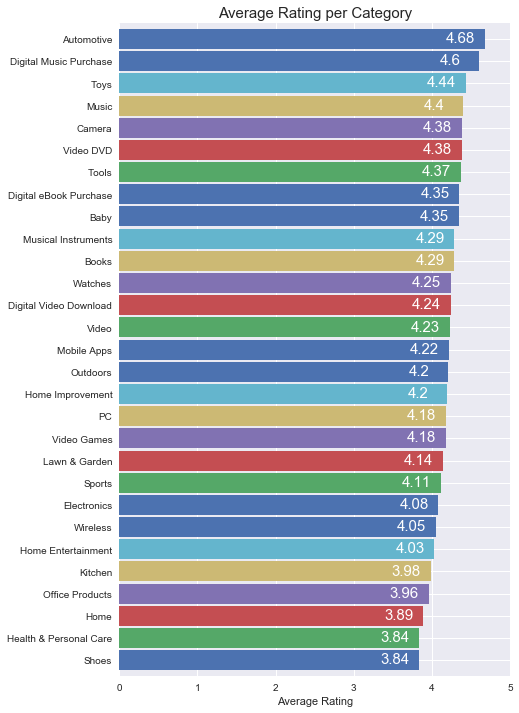

In [120]:
plt.figure(figsize=(7,12))

# Plot average rating by product category
ax = apr.groupby('product_category').star_rating.mean().sort_values().plot.barh(width=0.9)
ax.set_title('Average Rating per Category', fontsize=15)
ax.set_xlim(0, 5)
ax.set_ylabel('')
ax.set_xlabel('Average Rating')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='white')

plt.show()

On average, the automotive category has the highest rated products (4.68), followed by digital music purchase (4.60) and toys (4.44).  The lowest rated category is shoes (3.84), followed by health & personal care (3.84) and home (3.89).  The range in average ratings from highest to lowest is 0.84.  

The categories rated low seem to be categories where customers don't know what they may be receiving, variability of quality among the same type of products, while the categories rated highly seem to have less variability in what one can receive.

<a id='product'></a>
#### <a href='#table'>Table of Contents</a>

### Breakdown of Ratings by Product Category

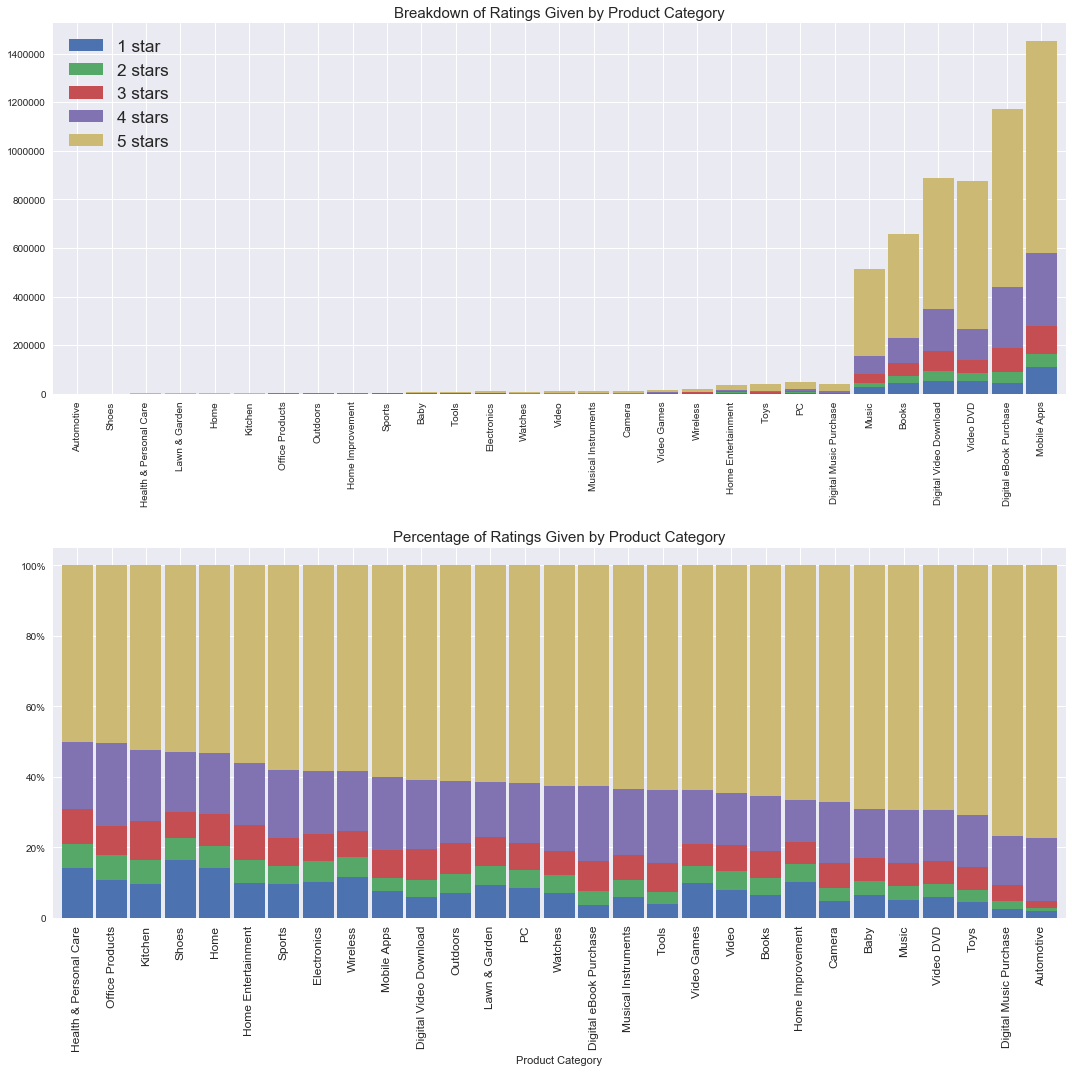

In [121]:
# Group dataset by product category and star ratings and count amount of ratings for each
grouped = apr.groupby(['product_category', 'star_rating']).count().reset_index()

# Pivot dataset to display how many of each rating a product category received
g_pivot = grouped.pivot(index='product_category', columns='star_rating', values='customer_id')

plt.figure(figsize=(15,15))

# Plot breakdown of total ratings given by product category
ax1 = plt.subplot(2,1,1)
g_pivot.sort_values(by=5.0).plot.bar(stacked=True, width=0.9, ax=ax1)
ax1.set_xlabel(' ')
ax1.set_title('Breakdown of Ratings Given by Product Category', fontsize=15)
ax1.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], loc='upper left', fontsize='xx-large')

# Plot breakdown percentage of ratings given by product category
ax2 = plt.subplot(2,1,2)
g_pivot.loc[:,1.0:5.0].div(g_pivot.sum(axis=1), axis=0).sort_values(by=5.0).plot.bar(stacked=True, width=0.9, ax=ax2)
ax2.set_title('Percentage of Ratings Given by Product Category', fontsize=15)
ax2.set_xlabel('Product Category')
ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
ax2.legend().remove()
plt.xticks(fontsize=12)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

As stated earlier, music, books, movies and mobile apps dominate the Amazon marketplace.  The biggest factor that seems to determine a product category's average rating is how many 5 stars, 4 stars and 1 stars that category receives.  2 stars and 3 stars appears to remain close to the same proportion throughout each category.

<a id='year'></a>


<a href='#table'>Table of Contents</a>

## Ratings by Year
We will now look into ratings on an annual scale.  It is worth noting that the last review in this dataset is August 31, 2015 so it appears that there is a drop in reviews for that year.

<a id='annual'></a>

### Annual Averages

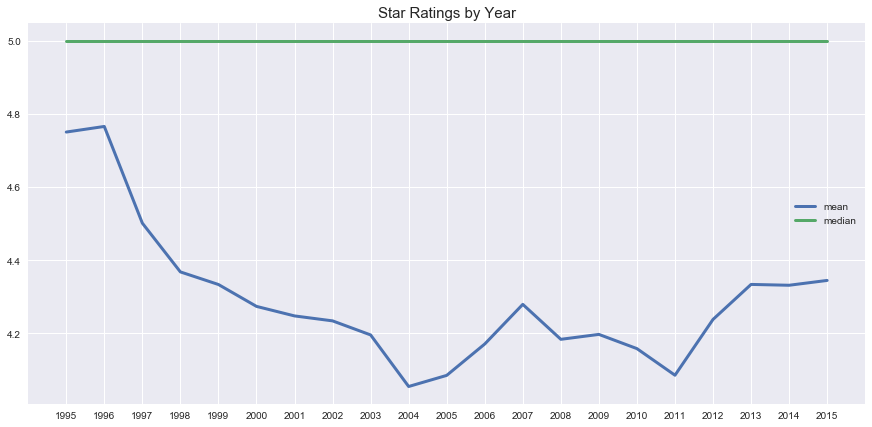

In [122]:
plt.figure(figsize=(15,7))
# Plot average star ratings by year
plt.plot('year', 'star_rating', data=apr.groupby('year').mean().reset_index().sort_values('year'), linewidth=3)

# Plot median star ratings by year
plt.plot('year', 'star_rating', data=apr.groupby('year').median().reset_index().sort_values('year'), linewidth=3)

plt.legend(['mean', 'median'], loc='right')
plt.title('Star Ratings by Year', fontsize = 15)
sns.despine(top=True, right=True)
plt.show()

Previously, we have discovered that products mostly recieve 5 star ratings so it is not a surprise that the median is 5 stars.  We can see that when amazon first introduced product reviews, there has been a drop and balance of average reviews on an annual basis.  Initially the average product reviews were just under 4.8 and dropped to roughly 4.1 in 2004.  Over time, the average annual product review has stayed between 4.1 and 4.4.

<a id='number'></a>
#### <a href='#table'>Table of Contents</a>

### Number of Ratings per Year

Last recorded rating was on 2015-08-31


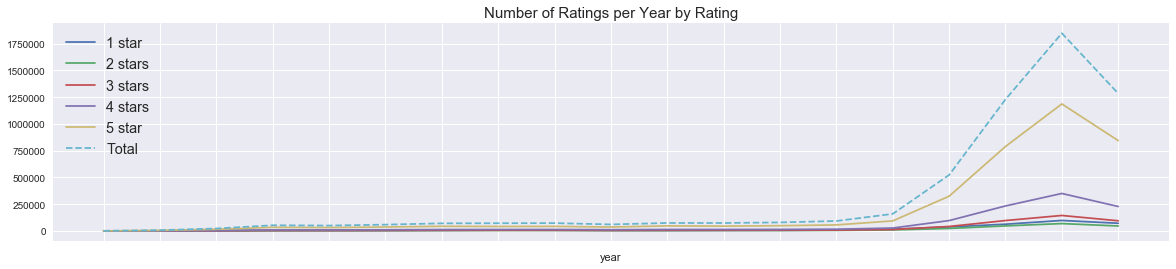

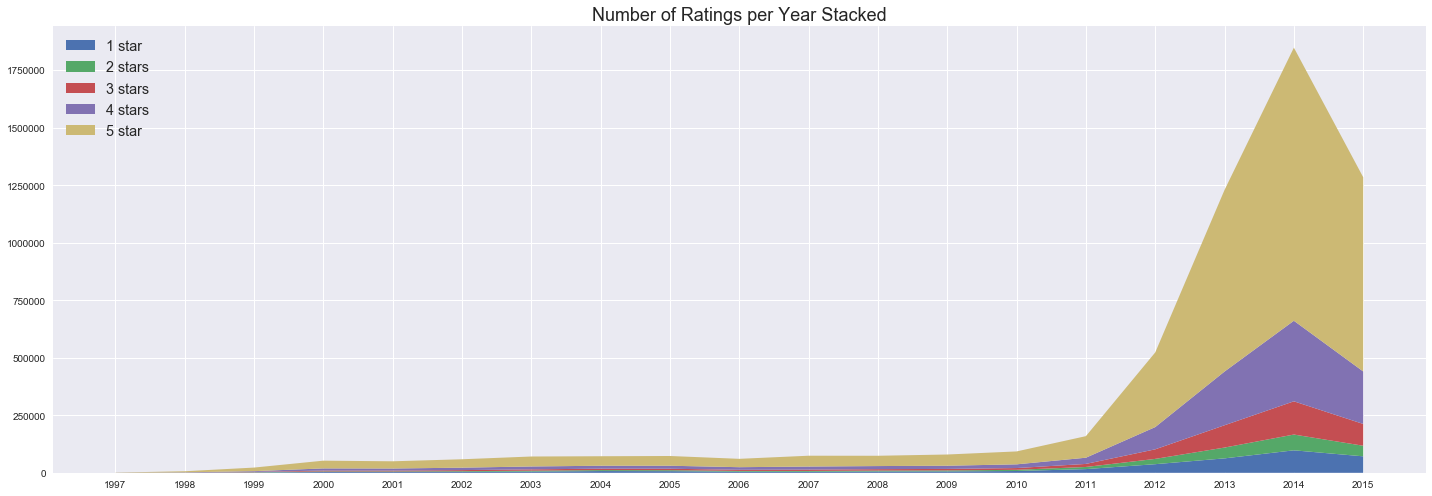

In [124]:
plt.figure(figsize=(20,4))

# Find last rating date
print('Last recorded rating was on {}'.format(apr.review_date.tail(1).iloc[0]))

# Make sure all ratings have the same time frame
time = ['1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']

# Separate ratings
one = apr[apr.star_rating == 1.0]
two = apr[apr.star_rating == 2.0]
three = apr[apr.star_rating == 3.0]
four = apr[apr.star_rating == 4.0]
five = apr[apr.star_rating == 5.0]

# Plot number of ratings per year per rating
one.groupby('year').count().star_rating[1:].plot()
two.groupby('year').count().star_rating[1:].plot()
three.groupby('year').count().star_rating.plot()
four.groupby('year').count().star_rating[2:].plot()
five.groupby('year').count().star_rating[2:].plot()

# Plot number of ratings per year
plt.plot(apr.groupby('year').count().star_rating[2:], linestyle='--')
plt.title('Number of Ratings per Year by Rating', fontsize=15)

plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star', 'Total'], loc='upper left', fontsize='x-large')
sns.despine(top=True, right=True)
plt.show()

# Plot number of ratings per year per rating
plt.figure(figsize=(20,7))
plt.stackplot(time,  
              one.groupby('year').count().star_rating[1:], 
              two.groupby('year').count().star_rating[1:], 
              three.groupby('year').count().star_rating, 
              four.groupby('year').count().star_rating[2:], 
              five.groupby('year').count().star_rating[2:])
plt.title('Number of Ratings per Year Stacked', fontsize=18)

plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 star'], loc='upper left', fontsize='x-large')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

As seen above, the Amazon marketplace started gaining popularity in 2010 and exploded exponentially from 2011 onwards.  Not only did the marketplace explode, it exploded with quality products as we can see higher rated reviews are steeper in the growth than lower rated reviews.  Although there seems to be a steep drop off from 2014 to 2015, it is worth noting that the last review available on this dataset was on August 31, 2015 so there are missing reviews for one third of the year for 2015.

<a id='month'></a>


<a href='#table'>Table of Contents</a>

## Ratings by Month
We will now look into ratings on a monthly scale. It is worth noting that the last review in this dataset is August 31, 2015 so it appears that there is a drop in reviews for that year.

<a id='monthly'></a>

### Monthly Rating Distributions

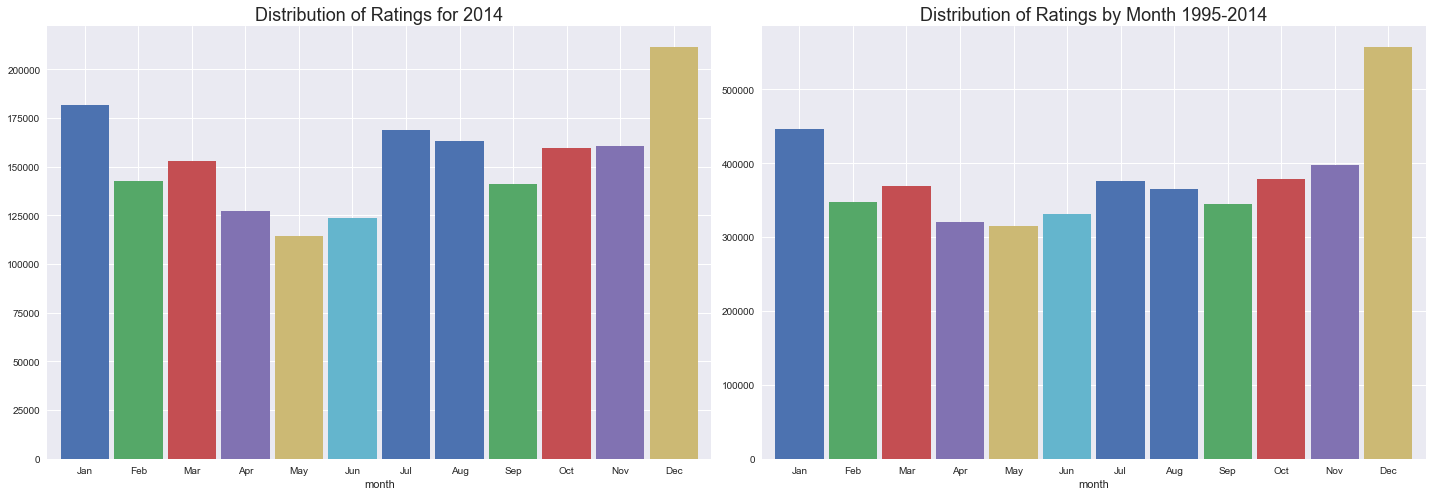

In [125]:
plt.figure(figsize=(20,7))

# Prepare xtick labels for months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot distribution of ratings for 2014
m = apr.groupby(['year','month']).count().reset_index()
ax1 = plt.subplot(1,2,1)
m[m.year == '2014'].set_index('month').star_rating.plot(kind='bar', width=0.9, ax=ax1)
ax1.set_xticklabels(months)
ax1.set_title('Distribution of Ratings for 2014', fontsize=18)
plt.xticks(rotation=0)

# Plot distribution of ratings per month
ax2 = plt.subplot(1,2,2)
apr[apr.year != '2015'].groupby('month').count().customer_id.plot(kind='bar', width=0.9, ax=ax2)
ax2.set_xticklabels(months)
ax2.set_title('Distribution of Ratings by Month 1995-2014', fontsize=18)
plt.xticks(rotation=0)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Over time, the distribution of monthly reviews matches the most current annual observation of monthly reviews.  December has the most reviews, followed by January.  This is likely because of the holiday season and the purchasing and exchange of gifts.  January is likely high because money is often a popular gift during the holidays and customers make purchases after the holidays are over.  April, May and June have the lowest review frequencies, possibly because of the change in weather and customers are likely more inclined to spend money on experiences (vacations and trips) rather than on products.

<a id='breakdown'></a>
#### <a href='#table'>Table of Contents</a>

### Breakdown of Monthly Rating Distributions

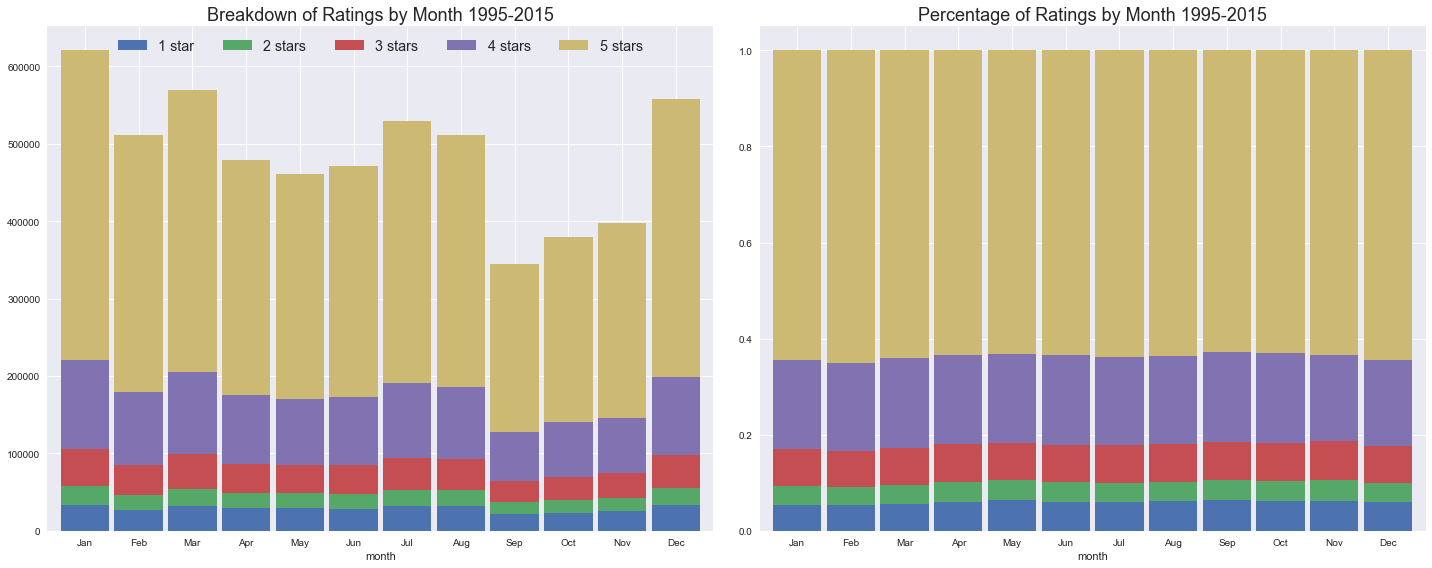

In [11]:
plt.figure(figsize=(20,8))

# Group dataset by month and star rating, then pivot to have amount of star ratings by month
group_month = apr.groupby(['month', 'star_rating']).count().reset_index()
gmon_pivot = group_month.pivot(index='month', columns='star_rating', values='customer_id')

# Plot breakdown of total ratings per month
ax1 = plt.subplot(1,2,1)
gmon_pivot.plot.bar(stacked=True, width=0.9, ax=ax1)
ax1.set_xticklabels(months)
ax1.set_title('Breakdown of Ratings by Month 1995-2015', fontsize=18)
plt.xticks(rotation=0)
plt.legend(['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], loc='upper center', ncol=5, fontsize='x-large')

# Plot breakdown percentage of total ratings per month
ax2 = plt.subplot(1,2,2)
gmon_pivot.loc[:,1.0:5.0].div(gmon_pivot.sum(axis=1), axis=0).plot.bar(stacked=True, width=0.9, ax=ax2)
ax2.set_xticklabels(months)
ax2.set_title('Percentage of Ratings by Month 1995-2015', fontsize=18)
plt.xticks(rotation=0)
plt.legend().remove()

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

The breakdown of rating distribution by month is directly related to the distribution of ratings by month and is roughly the same throughout the year.

<a id='time'></a>

<a href='#table'>Table of Contents</a>

## Ratings Over Time

Last recorded rating was on 2015-08-31


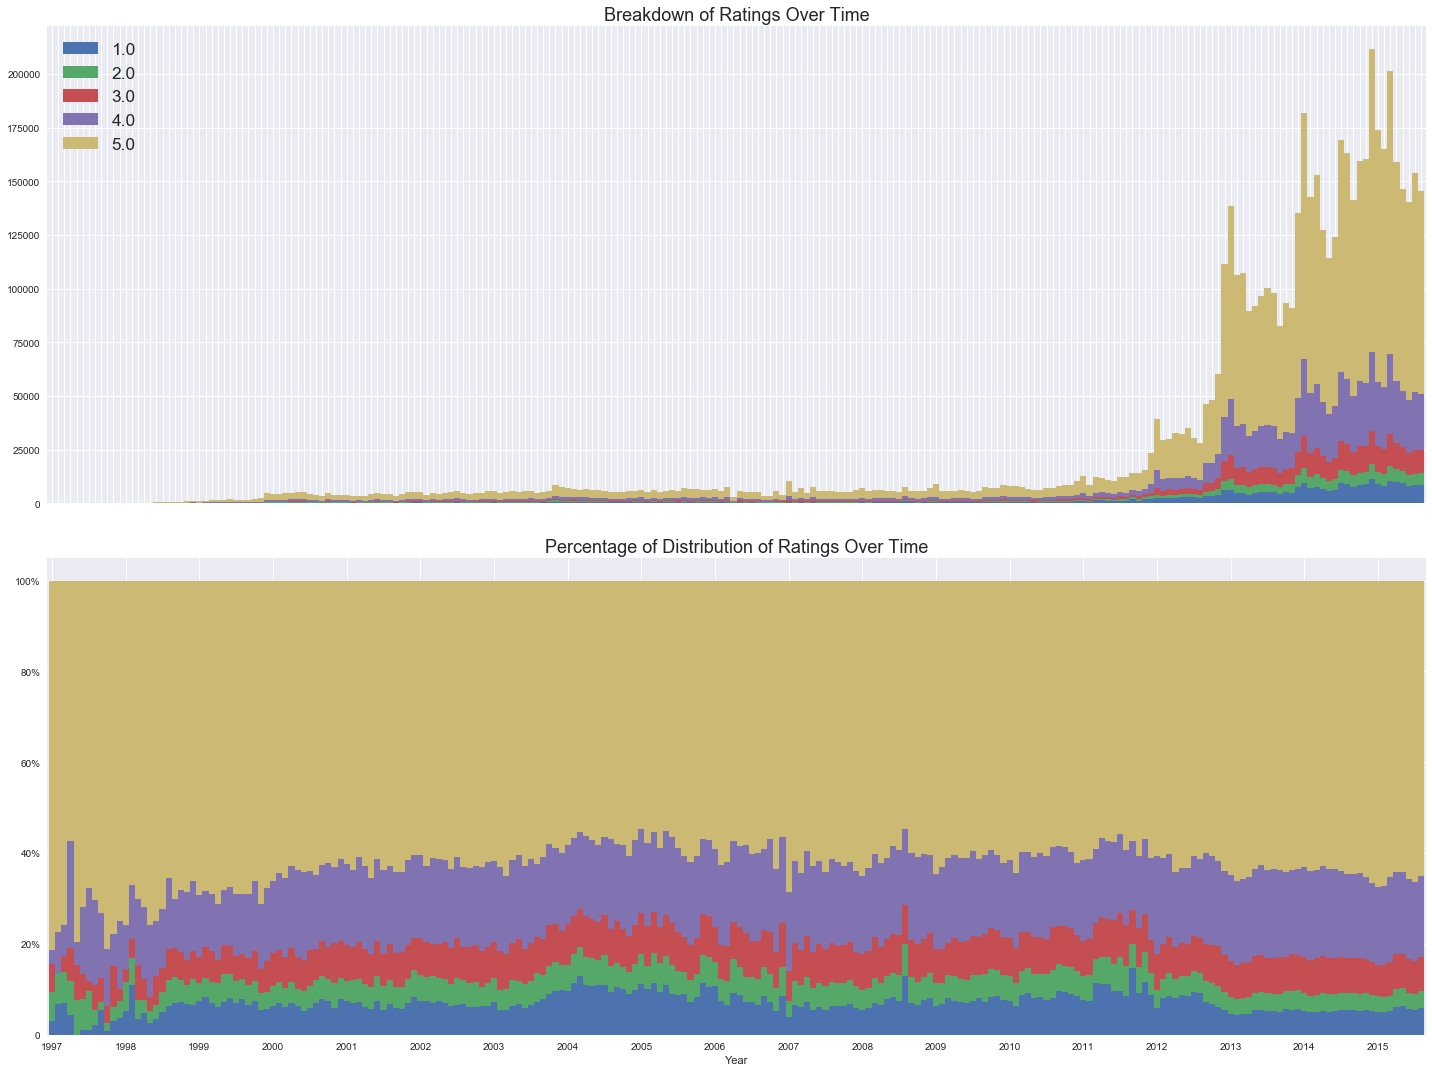

In [126]:
plt.figure(figsize=(20,15))

# Group dataset by month-year and star rating, then pivot to have amount of star ratings over time
group_month = apr.groupby(['month_year', 'star_rating']).count().reset_index()
gm_pivot = group_month.pivot(index='month_year', columns='star_rating', values='customer_id')

# Find last rating date
print('Last recorded rating was on {}'.format(apr.review_date.tail(1).iloc[0]))

# Plot breakdown of total ratings over time
ax1 = plt.subplot(2,1,1)
gm_pivot.iloc[11:, :5].plot.bar(stacked=True, width=1, ax=ax1)
ax1.set_xticklabels(' ')
ax1.set_xlabel(' ')
ax1.legend(fontsize='xx-large')
ax1.set_title('Breakdown of Ratings Over Time', fontsize=18)


# Plot breakdown percentage of total ratings over time
ax2 = plt.subplot(2,1,2)
gm_pivot.iloc[11:, :5].div(gm_pivot.iloc[11:, :5].sum(axis=1), axis=0).plot.bar(stacked=True, width=1, ax=ax2)
ax2.set_yticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
ax2.set_xticklabels(['1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'])
ax2.legend().remove()
ax2.set_xlabel('Year')
ax2.set_title('Percentage of Distribution of Ratings Over Time', fontsize=18)
plt.xticks(rotation=0)
plt.locator_params(axis='x', nbins=19)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

The breakdown of ratings over time changes slightly over time with no clear spike in changes to rating behavior.  Although we can see where the spike in reviews occur for each year starting in 2011.  As previously observed, these spikes are in January and December of each year.

<a href='#table'>Table of Contents</a>

## Conclusion
In our analysis we were able to look at:
- the distribution of ratings among products and customers.
- determine the most popular products and categories.
- look at the highest rated categories and see what affects rating averages.
- observe how ratings change over time.
- determine the point where the Amazon marketplace exploded in growth.

We have found that:
- over 60% of all reviews receive 5 star ratings.
- most products have between 100 and 1,000 reviews.
- most customers give between 1 and 10 reviews.
- out of 11,500+ products, less than 250 have an average rating under 3.0.
- 90% of the Amazon marketplace revolves around books, music, movies and mobile apps.
- the top 3 categories have intangible products (digital).
- the range in the difference of average categorical ratings is 0.84, from 3.84 to 4.68.
- over time the average annual ratings stay between 4.1 and 4.4.
- the marketplace has grown exponentially since 2011.
- average product ratings are mostly affected by 5, 4 and 1 star reviews.
- most reviews occur in January and December, likely because of the holidays.

Through our analysis we were able to look at some purchasing and review behaviors in relation to customers and products.

<a href='#table'>Table of Contents</a>